In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Distribution plots for Density feature is shown ↓


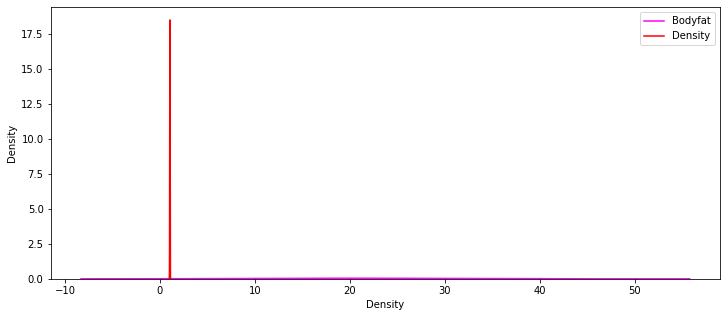

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is shown ↓


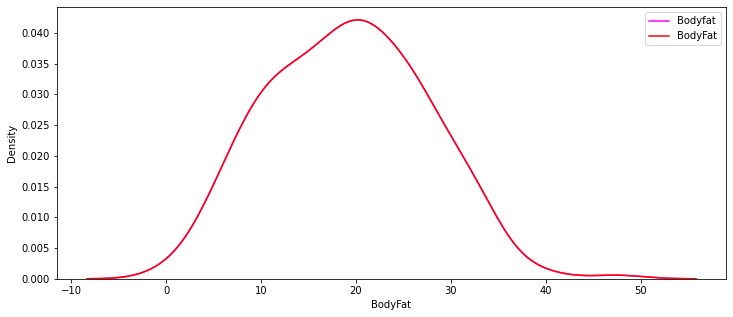

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is shown ↓


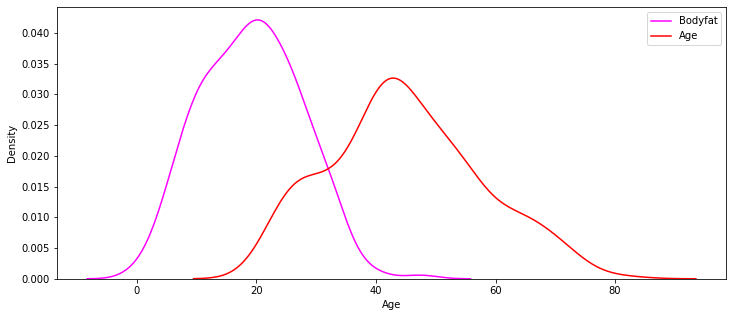

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown ↓


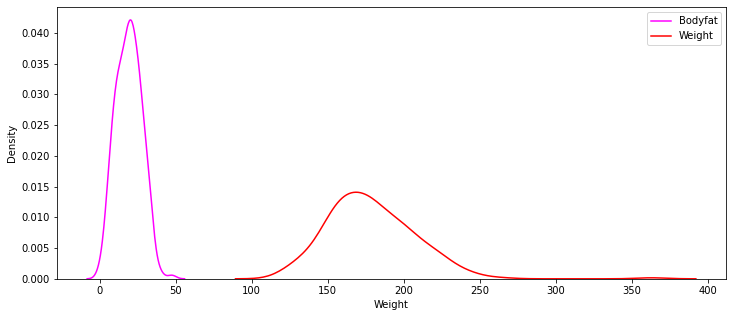

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is shown ↓


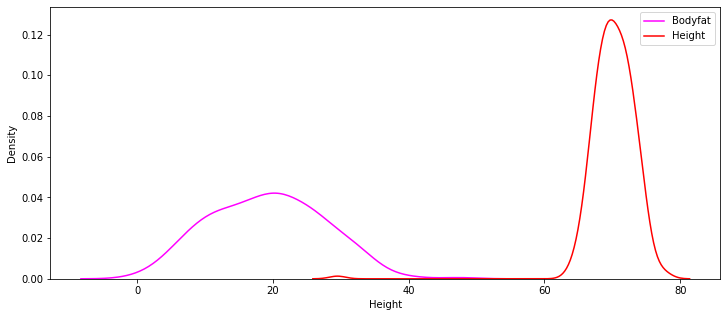

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is shown ↓


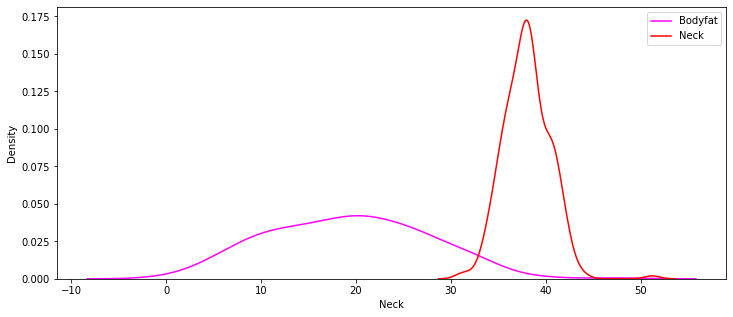

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown ↓


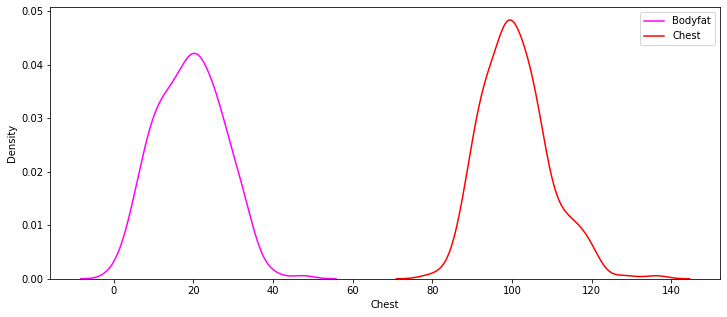

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown ↓


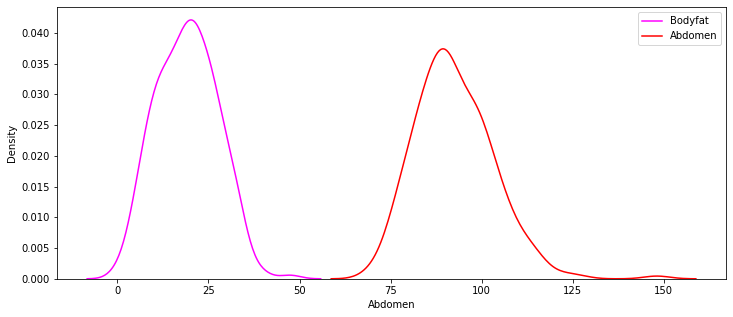

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown ↓


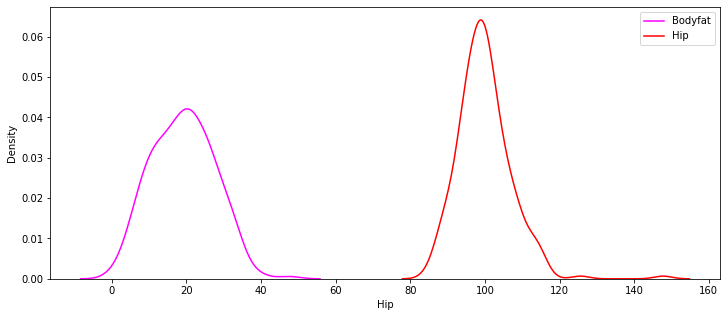

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is shown ↓


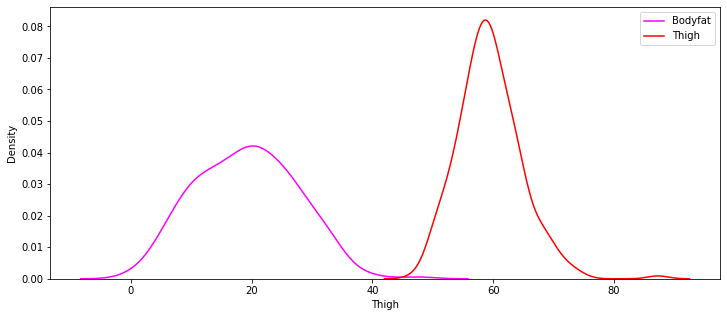

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is shown ↓


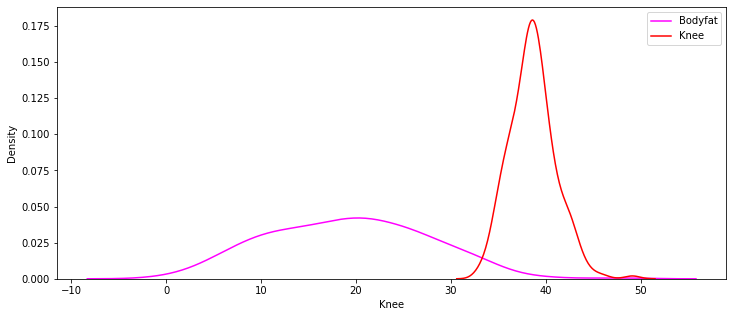

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is shown ↓


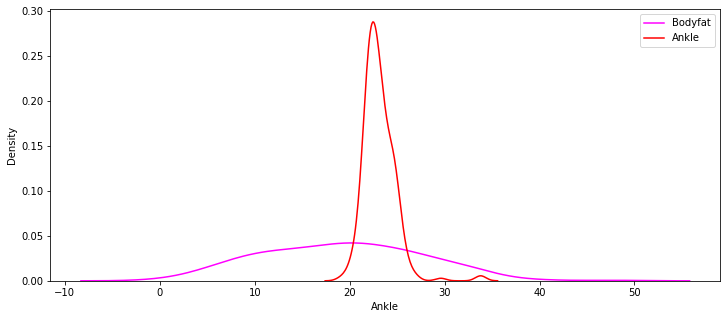

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown ↓


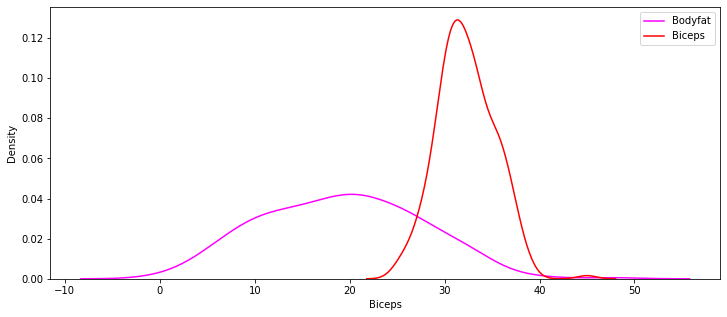

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is shown ↓


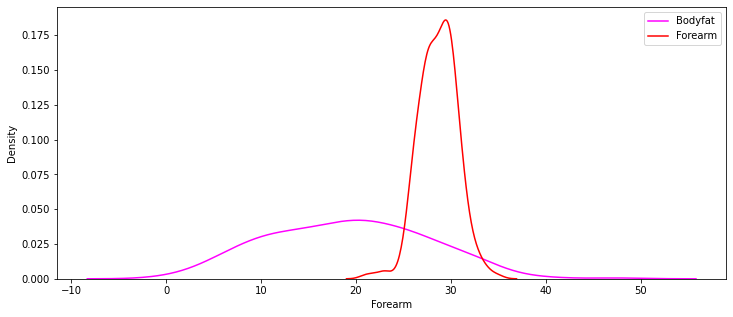

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is shown ↓


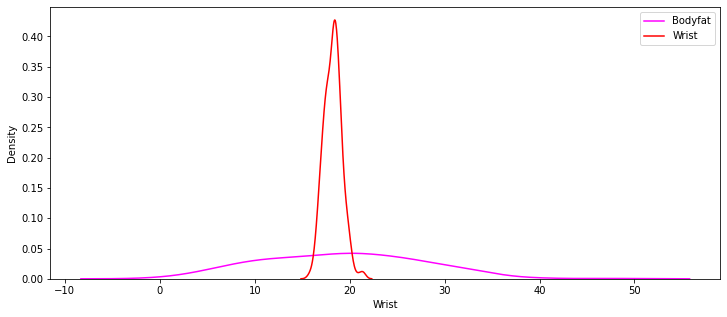

----------------------------------------------------------------------------------------------------


In [10]:
def plotdistplots(col):
    
    plt.figure(figsize=(12,5))
    sn.distplot(df['BodyFat'],color='magenta',hist=False,label='Bodyfat')
    sn.distplot(df[col],color = 'red',hist=False,label=col)
    plt.legend()
    plt.show()
    
    
cols = list(df.columns)
for i in cols:
    print(f'Distribution plots for {i} feature is shown ↓')
    plotdistplots(i)
    print("-"*100)

In [11]:
import scipy.stats as stats

Distribution plots for the feature Density are shown ↓


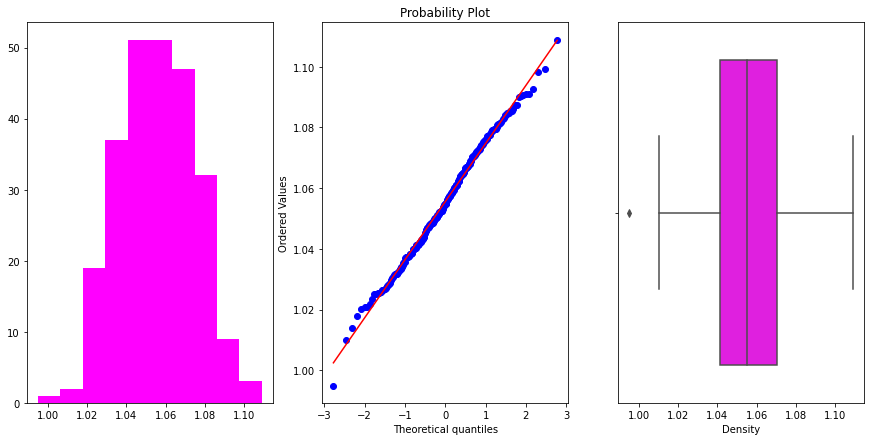

Distribution plots for the feature BodyFat are shown ↓


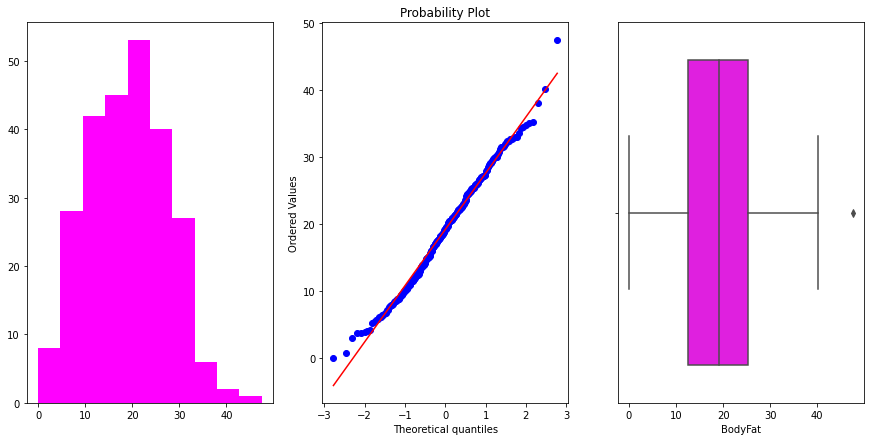

Distribution plots for the feature Age are shown ↓


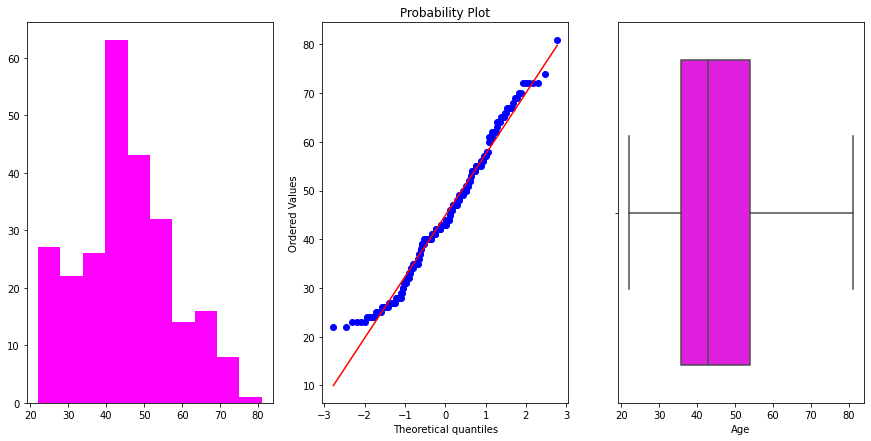

Distribution plots for the feature Weight are shown ↓


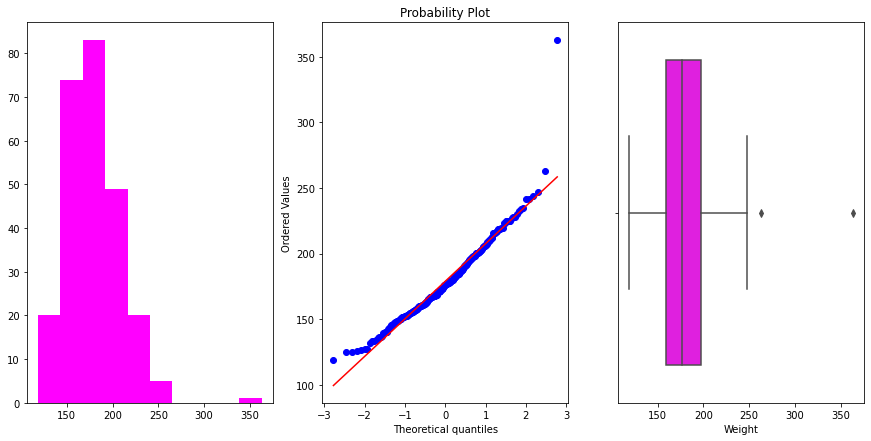

Distribution plots for the feature Height are shown ↓


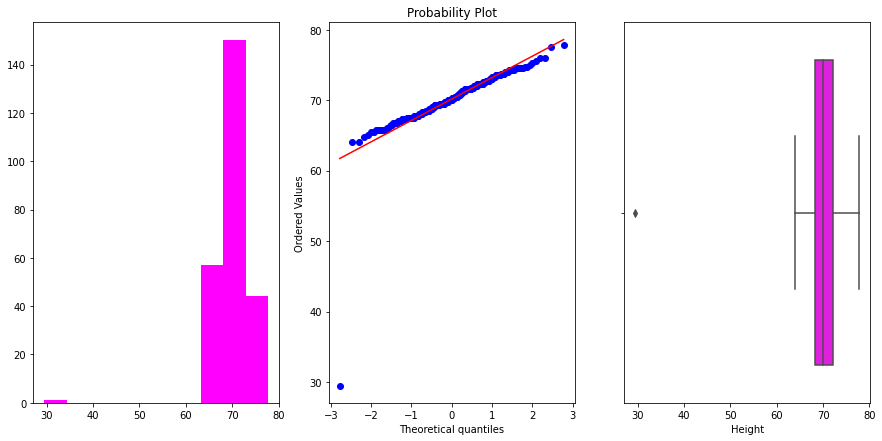

Distribution plots for the feature Neck are shown ↓


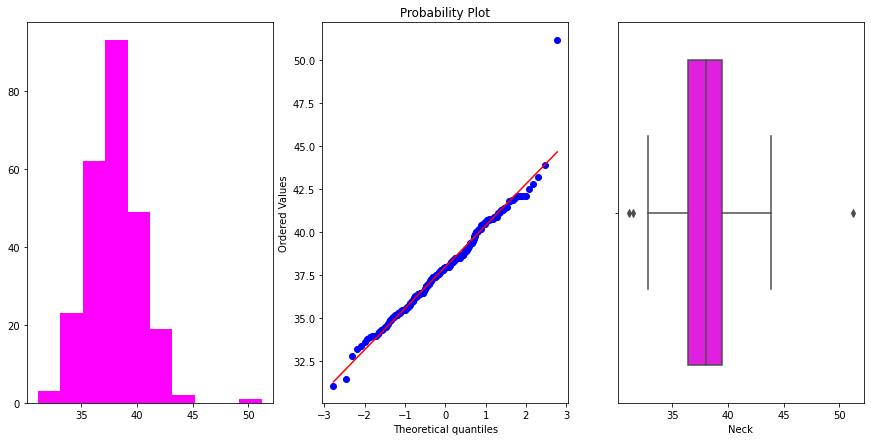

Distribution plots for the feature Chest are shown ↓


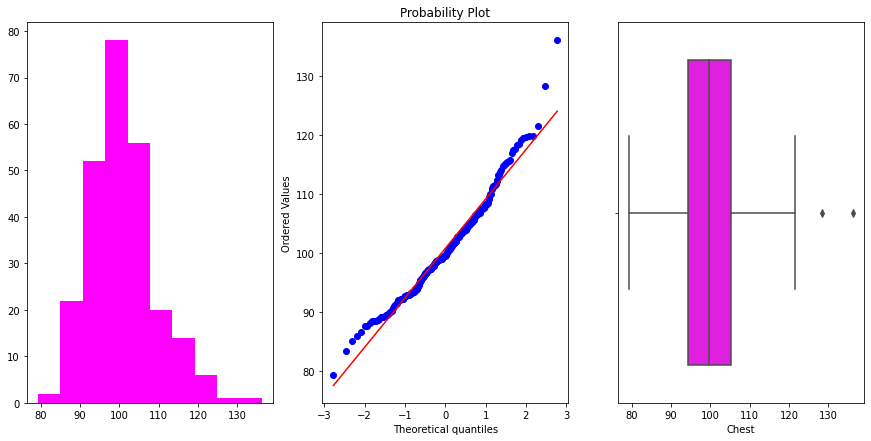

Distribution plots for the feature Abdomen are shown ↓


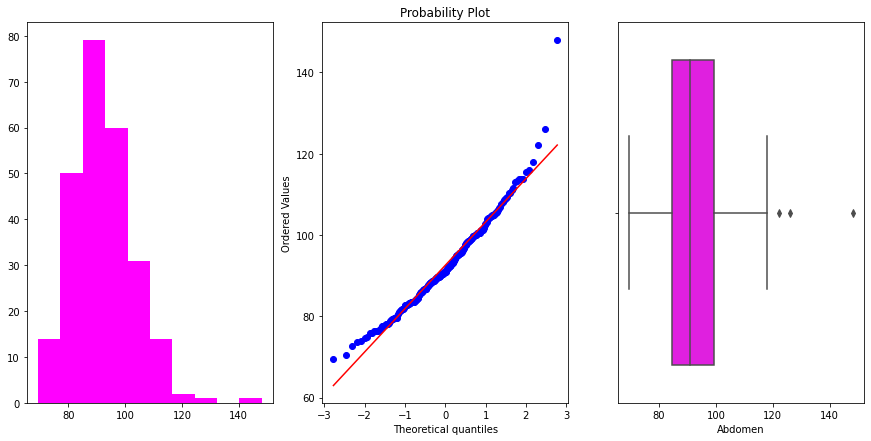

Distribution plots for the feature Hip are shown ↓


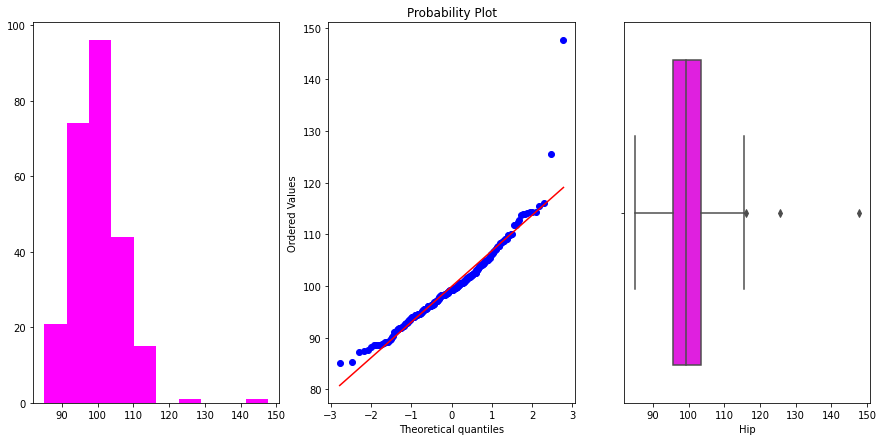

Distribution plots for the feature Thigh are shown ↓


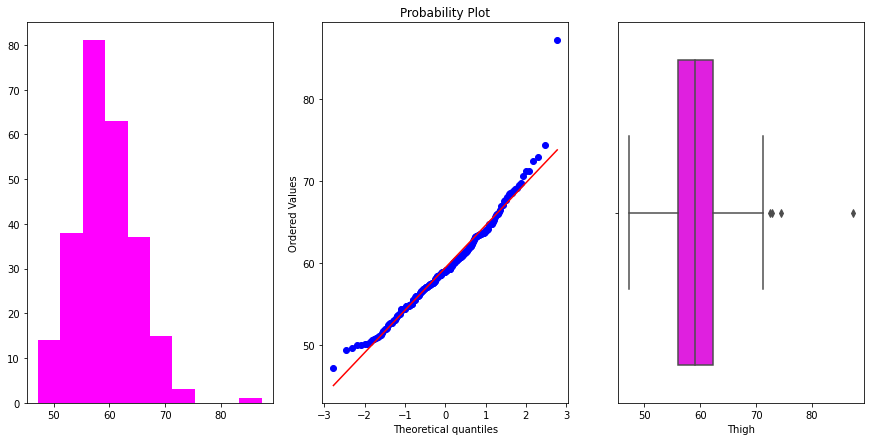

Distribution plots for the feature Knee are shown ↓


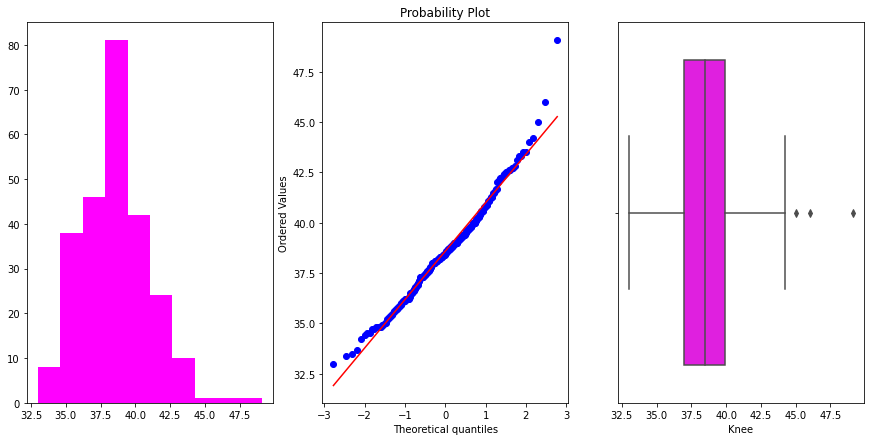

Distribution plots for the feature Ankle are shown ↓


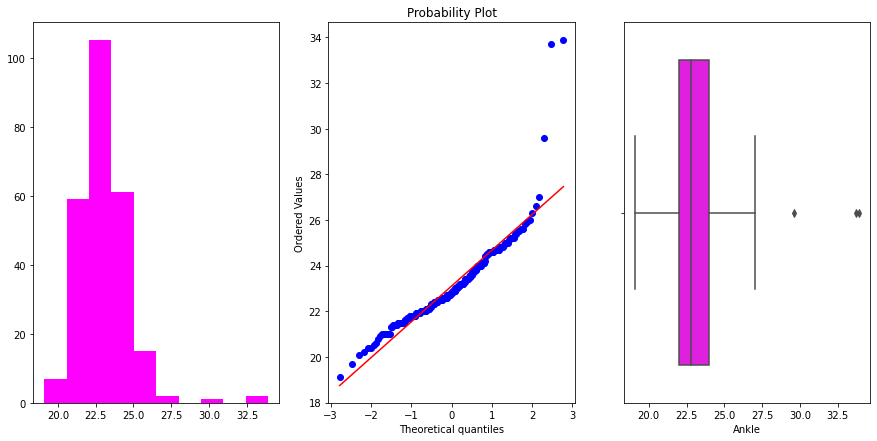

Distribution plots for the feature Biceps are shown ↓


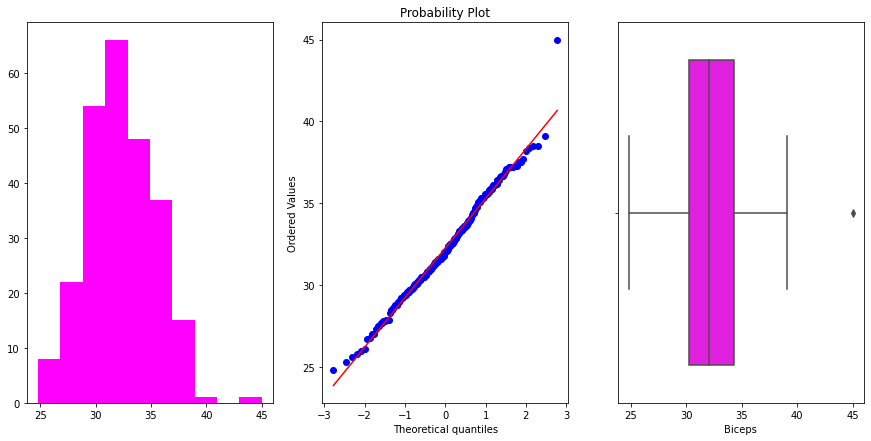

Distribution plots for the feature Forearm are shown ↓


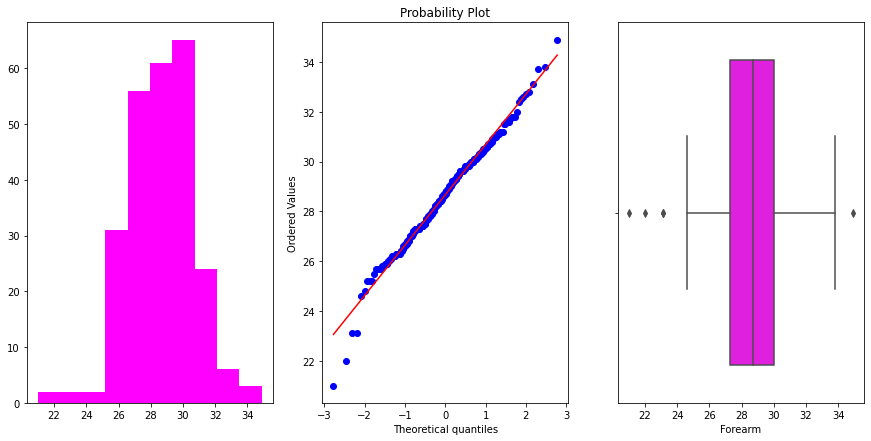

Distribution plots for the feature Wrist are shown ↓


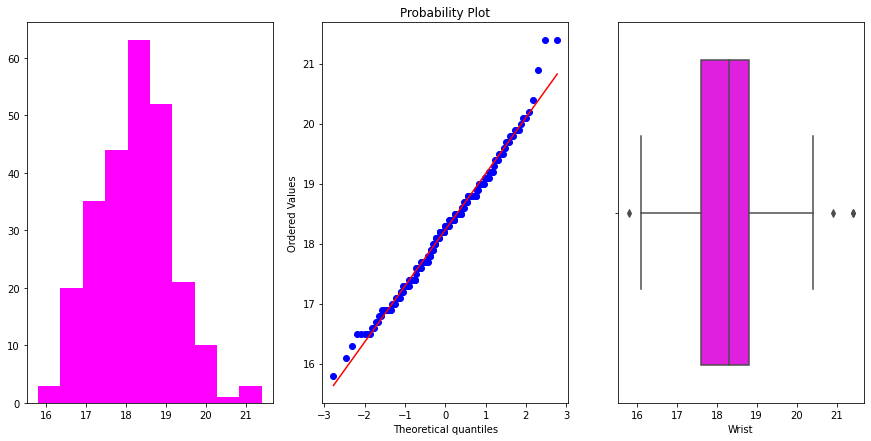

In [12]:
def drawplots(df,col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color='magenta')
    
    
    plt.show()
    
    
cols = list(df.columns)
for i in range(len(cols)):
    
    print(f'Distribution plots for the feature {cols[i]} are shown ↓')
    
    drawplots(df,cols[i])
    
    print("="*100)

### Checking for Outliers

In [13]:
upperlimit = []
lowerlimit = []
for i in df.columns:
    upperlimit.append(df[i].mean()+(df[i].std())*4)
    lowerlimit.append(df[i].mean()-(df[i].std())*4)

In [14]:
cols = list(df.columns)
j = 0
for i in range(len(cols)):
    
    temp = df.loc[(df[cols[i]]>upperlimit[j])&(df[cols[i]]<lowerlimit[j])]
    j+=1

In [15]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


## Using ExtraTrees Regressor for Feature Selection

In [16]:
data = df.copy()
test = data['BodyFat']
train = data.drop(['BodyFat'],axis=1)

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

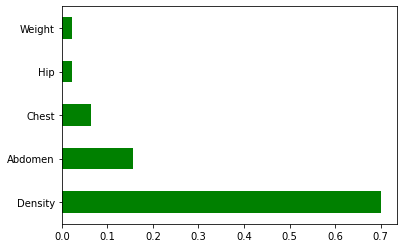

In [18]:
series = pd.Series(er.feature_importances_,index=train.columns)
series.nlargest(5).plot(kind = 'barh',color = 'green')

## Using Mutual Information Gain for Feature Selection

In [19]:
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(train,test)

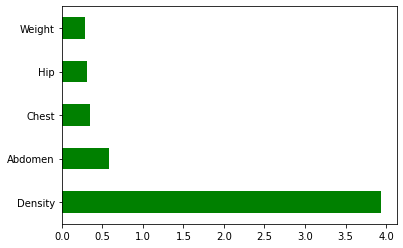

In [20]:
plotdata = pd.Series(mr,index=train.columns)
plotdata.nlargest(5).plot(kind = 'barh',color = 'green')

## Removing correlation

In [21]:
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


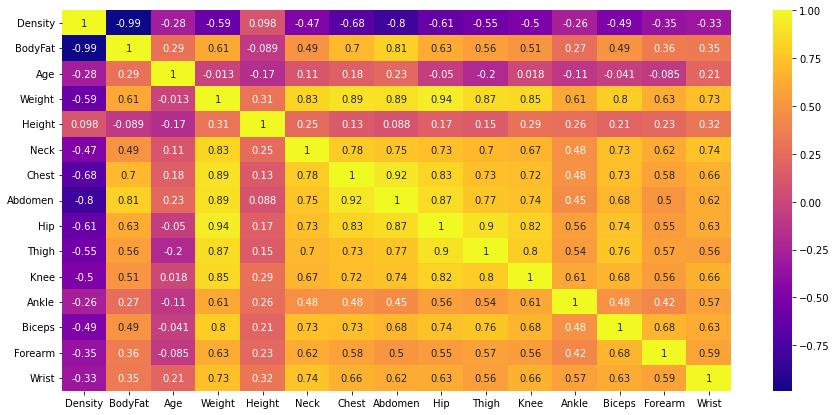

In [22]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [23]:
def correlation(df,threshold):
    
    colcor = set()
    
    cormat = df.corr()
    
    for i in range(len(cormat)):
        
        for j in range(i):
            
            '''
            for each cell get the value of that cell by .iloc[i][j],
            where i is the row and j is the col if that abs(value) is greater
            than the threshold,get the col_name and add it in the set
            
            '''
            
            if abs(cormat.iloc[i][j])>threshold:
                colname = cormat.columns[i]
                colcor.add(colname)
                
                
    return colcor


ans = correlation(train,threshold=0.85)

ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

**From the above feature selection techniques we can say that the features recommended by the `Extra Trees Regressor` and the `mutual_information_gain` are correct and from the correlation map we get to observe the similar pattern we noticed that `Abdomen` and `Hip` are having similar features,they're having collinearity,same goes with knee and thigh,we can either keep any one of them and we noticed that the feature `Abdomen` gave more feature importance score in comparision to `Hip`,so i will be selecting that**

In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
temp = data[list(data.columns)]
info = pd.DataFrame()
info['VIF'] = [variance_inflation_factor(temp.values,i) for i in range(temp.shape[1])]
info['Column'] = temp.columns
info

,VIF,Column
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [26]:
cols1 = list(series.nlargest(5).index)
cols2 = list(plotdata.nlargest(5).index)

cols1,cols2

(['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

**We'll go with the `Weight and Hip` method,as `Hip` and `Thigh` are very much related,so we'll select the cols1 features and drop every other feature,if that doesn't produce any further importance we will try with some other feature**

In [27]:
totrain = train[cols1]
totrain.head()

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25


In [28]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [29]:
X_train, X_test, y_train, y_test = train_test_split(totrain,test,test_size=0.2)
X_train.shape,X_test.shape

((201, 5), (51, 5))

In [30]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(reg,filled=True)

[Text(398.62234669811323, 364.66499999999996, 'X[0] <= 1.056\nsquared_error = 71.135\nsamples = 201\nvalue = 18.914'),
 Text(161.1049528301887, 332.955, 'X[0] <= 1.036\nsquared_error = 26.042\nsamples = 99\nvalue = 25.923'),
 Text(51.98349056603774, 301.245, 'X[0] <= 1.014\nsquared_error = 14.649\nsamples = 32\nvalue = 31.934'),
 Text(26.32075471698113, 269.53499999999997, 'X[4] <= 205.375\nsquared_error = 13.69\nsamples = 2\nvalue = 43.8'),
 Text(22.81132075471698, 237.825, 'squared_error = 0.0\nsamples = 1\nvalue = 40.1'),
 Text(29.830188679245285, 237.825, 'squared_error = 0.0\nsamples = 1\nvalue = 47.5'),
 Text(77.64622641509435, 269.53499999999997, 'X[0] <= 1.029\nsquared_error = 4.7\nsamples = 30\nvalue = 31.143'),
 Text(36.84905660377358, 237.825, 'X[0] <= 1.025\nsquared_error = 1.849\nsamples = 14\nvalue = 33.107'),
 Text(15.79245283018868, 206.115, 'X[2] <= 117.25\nsquared_error = 0.276\nsamples = 6\nvalue = 34.567'),
 Text(7.018867924528302, 174.405, 'X[4] <= 214.625\nsquared

In [31]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas

In [32]:
alphalist = []
for i in range(len(ccp_alpha)):
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    reg.fit(X_train,y_train)
    alphalist.append(reg)

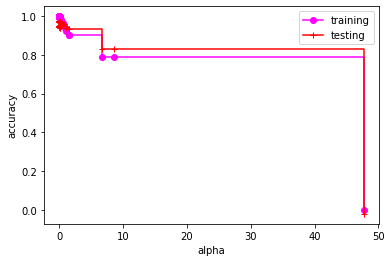

In [33]:
trainscore = [alphalist[i].score(X_train,y_train) for i in range(len(alphalist))]

testscore = [alphalist[i].score(X_test,y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,trainscore,marker = 'o',label = 'training',color = 'magenta',drawstyle = 'steps-post')
plt.plot(ccp_alpha,testscore,marker = '+',label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

In [34]:
## normal approach

clf = DecisionTreeRegressor(ccp_alpha=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f' Decision Tree Normal Approach : {metrics.r2_score(y_test,y_pred)}')


rf = RandomForestRegressor(n_estimators=1000,ccp_alpha=1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f' Random Forest Normal Approach : {metrics.r2_score(y_test,y_pred_rf)}')

 Decision Tree Normal Approach : 0.9496151622616432
 Random Forest Normal Approach : 0.9875538205441564


## Hyperparameter Tuning

In [35]:
params = {
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'criterion' : ["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[1,2,2.5,3,3.5,4,5],
        }
    },
    
    'D-tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[1,2,2.5,3,3.5,4,5],
        }
    },
    'SVM':{
        'model':SVR(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [36]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],
                            cv=5,n_jobs=-1,n_iter=10,scoring='neg_mean_squared_error')
    
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

In [37]:
scoresdf = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scoresdf

,model_name,best_score,best_estimator
0,RandomForest,-6.182185,"(DecisionTreeRegressor(ccp_alpha=1, max_depth=..."
1,D-tree,-17.009355,"DecisionTreeRegressor(ccp_alpha=3.5, criterion..."
2,SVM,-36.795810,"SVR(C=0.5, kernel='poly', max_iter=111, tol=1e..."


In [38]:
scores[0]['best_estimator']

RandomForestRegressor(ccp_alpha=1, criterion='mse', max_depth=8,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=800)

In [39]:
rf = scores[0]['best_estimator']
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(metrics.r2_score(y_test,y_pred))

0.9469245711688787


In [40]:
totrainlist = np.array(totrain)
predicted = []
for i in range(len(totrainlist)):
    predicted.append(rf.predict([totrainlist[i]]))
    
totrain['Actual Result'] = test
totrain['Predicted Result'] = np.array(predicted)
totrain

,Density,Abdomen,Chest,Hip,Weight,Actual Result,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.223989
1,1.0853,83.0,93.6,98.7,173.25,6.1,8.408490
2,1.0414,87.9,95.8,99.2,154.00,25.3,22.682006
3,1.0751,86.4,101.8,101.2,184.75,10.4,11.182535
4,1.0340,100.0,97.3,101.9,184.25,28.7,27.096656
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,10.806121
248,1.0236,105.0,108.5,104.5,201.00,33.6,30.070811
249,1.0328,111.5,111.1,101.7,186.75,29.3,29.237446
250,1.0399,101.3,108.3,97.8,190.75,26.0,26.286739


[]

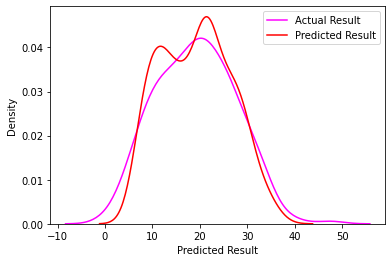

In [41]:
sn.distplot(totrain['Actual Result'],label='Actual Result',hist=False,color='magenta')
sn.distplot(totrain['Predicted Result'],label='Predicted Result',hist=False,color='red')
plt.legend()
plt.plot()

In [42]:
# saving the model

import pickle
file = open('bodyfatmodel.pkl','wb')
pickle.dump(rf,file)
file.close()